**Importing the required libraries**

In [212]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Uploading local data**

In [213]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# **Q1) Exploratory Data Analysis (EDA)**

i) Counting Non null values per column and replacing them with mean

In [214]:
links.info()
print()
links

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


Removing the 8 tmdbId null values for links.csv

In [215]:
#links['tmdbId'].fillna(value=links['tmdbId'].mean(), inplace = True)
links.dropna(axis=0,inplace=True)
ratings.dropna(axis=0,inplace=True)

In [216]:
links.info()
print()
links

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [217]:
movies.info()
print()
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [218]:
# movies.info()
genre_movie = dict()
for i in movies['genres']:
  lt = i.split('|')
  for j in lt:
    if j in genre_movie:
      continue
    else:
      genre_movie[j] = []
for i in range(len(movies)):
  lt = movies['genres'][i].split('|')
  for j in lt:
    genre_movie[j].append(movies['title'][i])
print(genre_movie)
# print()

movies


{'Adventure': ['Toy Story (1995)', 'Jumanji (1995)', 'Tom and Huck (1995)', 'GoldenEye (1995)', 'Balto (1995)', 'Cutthroat Island (1995)', 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 'Mortal Kombat (1995)', 'Lamerica (1994)', 'Indian in the Cupboard, The (1995)', 'White Squall (1996)', 'Broken Arrow (1996)', 'Bottle Rocket (1996)', 'Muppet Treasure Island (1996)', 'Rumble in the Bronx (Hont faan kui) (1995)', 'NeverEnding Story III, The (1994)', 'Amazing Panda Adventure, The (1995)', 'Apollo 13 (1995)', 'Batman Forever (1995)', 'Beyond Rangoon (1995)', 'Casper (1995)', 'Congo (1995)', 'Free Willy 2: The Adventure Home (1995)', 'Hackers (1995)', 'Waterworld (1995)', 'Bushwhacked (1995)', 'Dumb & Dumber (Dumb and Dumber) (1994)', 'Far From Home: The Adventures of Yellow Dog (1995)', "Kid in King Arthur's Court, A (1995)", 'Star Wars: Episode IV - A New Hope (1977)', 'Stargate (1994)', 'Star Trek: Generations (1994)', 'War, The (1994)', 'Jungle Book, The (1994)', 'L

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [219]:
movie_genre = dict()
for i in range(len(movies)):
  movie_genre[movies['title'][i]] = movies['genres'][i].split('|')
movie_genre

{'Toy Story (1995)': ['Adventure',
  'Animation',
  'Children',
  'Comedy',
  'Fantasy'],
 'Jumanji (1995)': ['Adventure', 'Children', 'Fantasy'],
 'Grumpier Old Men (1995)': ['Comedy', 'Romance'],
 'Waiting to Exhale (1995)': ['Comedy', 'Drama', 'Romance'],
 'Father of the Bride Part II (1995)': ['Comedy'],
 'Heat (1995)': ['Action', 'Crime', 'Thriller'],
 'Sabrina (1995)': ['Comedy', 'Romance'],
 'Tom and Huck (1995)': ['Adventure', 'Children'],
 'Sudden Death (1995)': ['Action'],
 'GoldenEye (1995)': ['Action', 'Adventure', 'Thriller'],
 'American President, The (1995)': ['Comedy', 'Drama', 'Romance'],
 'Dracula: Dead and Loving It (1995)': ['Comedy', 'Horror'],
 'Balto (1995)': ['Adventure', 'Animation', 'Children'],
 'Nixon (1995)': ['Drama'],
 'Cutthroat Island (1995)': ['Action', 'Adventure', 'Romance'],
 'Casino (1995)': ['Crime', 'Drama'],
 'Sense and Sensibility (1995)': ['Drama', 'Romance'],
 'Four Rooms (1995)': ['Comedy'],
 'Ace Ventura: When Nature Calls (1995)': ['Comedy

In [220]:
import re
movies_year = dict()
cnt = 0
for i in movies['title']:
  # if i[-2] == ')':
    # print(i)
  if (''.join(x for x in i if x.isdigit()))[-4:] == '':
    continue
  else:
    movies_year[i] =  int((''.join(x for x in i if x.isdigit()))[-4:])
  # print(movies_year[i])
# print(movies_year)
movies_year['Ready Player One'] = 2018
movies_year['Hyena Road'] = 2015
movies_year['The Adventures of Sherlock Holmes and Doctor Watson'] = 1983
movies_year['Nocturnal Animals'] = 2016
movies_year['Paterson'] = 2016
movies_year['Moonlight'] = 2016
movies_year['The OA'] = 2016
movies_year['Cosmos'] = 2014
movies_year['Maria Bamford: Old Baby'] = 2017
movies_year['Black Mirror'] = 2011

print(movies_year)

{'Toy Story (1995)': 1995, 'Jumanji (1995)': 1995, 'Grumpier Old Men (1995)': 1995, 'Waiting to Exhale (1995)': 1995, 'Father of the Bride Part II (1995)': 1995, 'Heat (1995)': 1995, 'Sabrina (1995)': 1995, 'Tom and Huck (1995)': 1995, 'Sudden Death (1995)': 1995, 'GoldenEye (1995)': 1995, 'American President, The (1995)': 1995, 'Dracula: Dead and Loving It (1995)': 1995, 'Balto (1995)': 1995, 'Nixon (1995)': 1995, 'Cutthroat Island (1995)': 1995, 'Casino (1995)': 1995, 'Sense and Sensibility (1995)': 1995, 'Four Rooms (1995)': 1995, 'Ace Ventura: When Nature Calls (1995)': 1995, 'Money Train (1995)': 1995, 'Get Shorty (1995)': 1995, 'Copycat (1995)': 1995, 'Assassins (1995)': 1995, 'Powder (1995)': 1995, 'Leaving Las Vegas (1995)': 1995, 'Othello (1995)': 1995, 'Now and Then (1995)': 1995, 'Persuasion (1995)': 1995, 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 1995, 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 1995, 'Dangerous Minds (1995)': 1995, 'Twe

In [221]:
ratings.info()
print()
ratings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.8 MB



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [222]:
tags.info()
print()
tags

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB



,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Statistics of all csv files

Links.csv

In [223]:
links.describe()

,movieId,imdbId,tmdbId
count,9734.000000,9.734000e+03,9734.000000
mean,42215.724471,6.775551e+05,55162.123793
std,52173.928589,1.107581e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3249.250000,9.518650e+04,9665.500000
50%,7300.000000,1.674155e+05,16529.000000
75%,76282.500000,8.059128e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


Movies.csv

In [224]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Ratings.csv

In [225]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Tags.csv

In [226]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


ii) Checking and remvoing duplicates

In [227]:
print('Duplicates in links.csv ')
links.duplicated().sum()

Duplicates in links.csv 


0

In [228]:
print('Duplicates in movies.csv ')
movies.duplicated().sum()

Duplicates in movies.csv 


0

In [229]:
print('Duplicates in ratings.csv ')
ratings.duplicated().sum()

Duplicates in ratings.csv 


0

In [230]:
print('Duplicates in tags.csv ')
tags.duplicated().sum()

Duplicates in tags.csv 


0

iii) **Correlation between features**

The ratings table has been used for creating the correlation matrix.

In [231]:
corr = ratings[['userId','movieId','rating']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,userId,movieId,rating
userId,1.00,0.01,-0.05
movieId,0.01,1.00,-0.00
rating,-0.05,-0.00,1.00


iv) Frequently Occuring Items in 'genre' in movies.csv

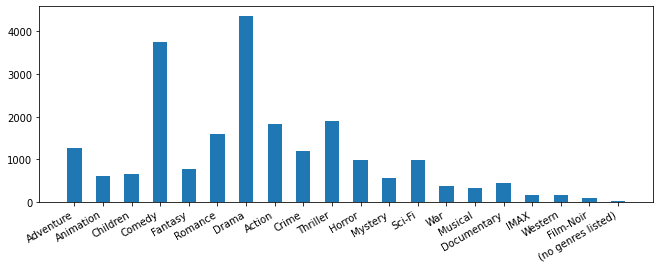

<Figure size 2160x720 with 0 Axes>

Adventure 1263
Animation 611
Children 664
Comedy 3756
Fantasy 779
Romance 1596
Drama 4361
Action 1828
Crime 1199
Thriller 1894
Horror 978
Mystery 573
Sci-Fi 980
War 382
Musical 334
Documentary 440
IMAX 158
Western 167
Film-Noir 87
(no genres listed) 34


In [232]:
genre_counts =  {}


for rows in movies['genres']:
  genres_in_row = rows.split('|')
  for genre in genres_in_row:
    if genre in genre_counts:
      genre_counts[genre]  = genre_counts[genre] + 1
    else:
      genre_counts[genre] = 1

genre_names = list(genre_counts.keys())
genre_counts = list(genre_counts.values())

fig, ax = plt.subplots()
plt.bar(range(len(genre_counts)), genre_counts, tick_label=genre_names, align='center', width=0.5)
plt.figure(figsize=(30, 10))
fig.autofmt_xdate()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

for i in range(len(genre_counts)):
  print(str(genre_names[i]) + ' '+ str(genre_counts[i]))


v) Scatter Plot of features in ratings.csv

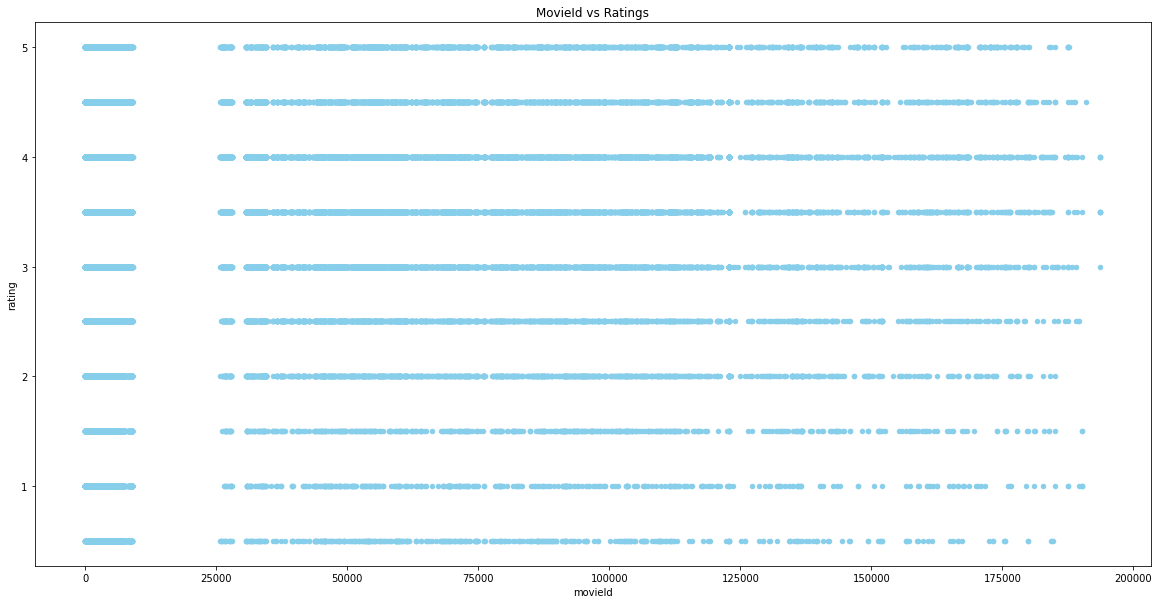

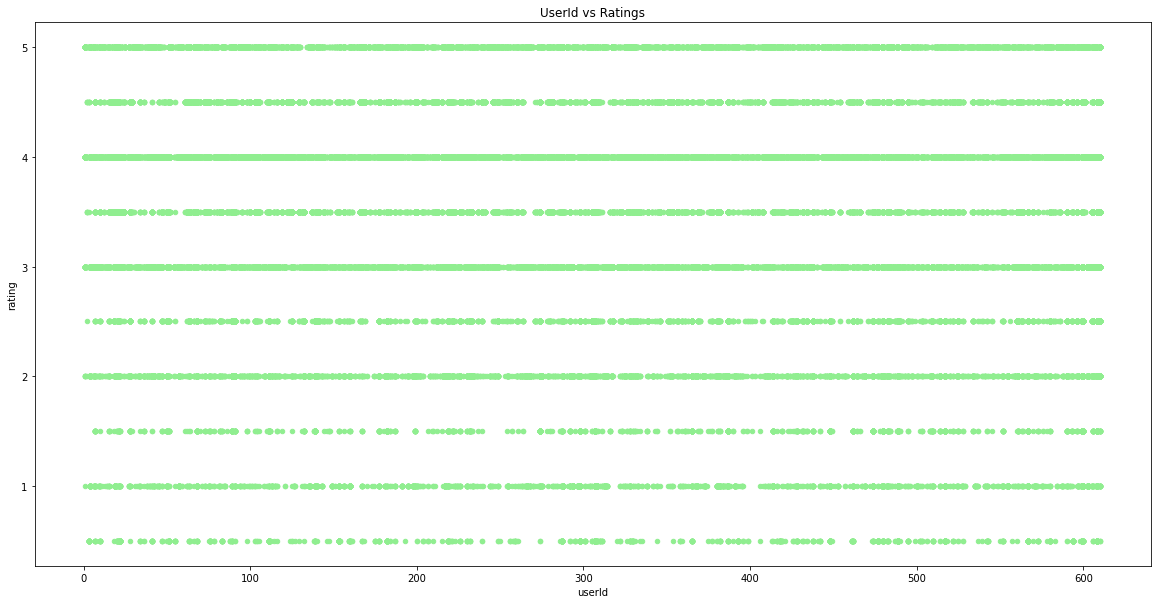

In [233]:
ratings.plot.scatter(x = 'movieId', y = 'rating', color = 'skyblue', title = 'MovieId vs Ratings')
ratings.plot.scatter(x = 'userId', y = 'rating', color = 'lightgreen', title = 'UserId vs Ratings')
plt.rcParams['figure.figsize']=(11,4)

**Q2)**

Data Preprocessing

In [234]:
transactions = dict()

for i in range(611):
  transactions[i] = []

for row in ratings.iterrows():
  transactions[row[1]['userId']].append(movies.loc[movies.movieId == row[1]['movieId'],'title'].tolist()[0])
  #print(row[1]['movieId'])

for row in tags.iterrows():
  movie_name = movies.loc[movies.movieId == row[1]['movieId'],'title'].tolist()[0]
  if movie_name not in transactions[row[1]['userId']]:
    transactions[row[1]['userId']].append(movie_name)

In [235]:
#print(transactions[610])
trnscs = []
for i in range(610):
  trnscs.append([])
for i in range(610):
  trnscs[i] = transactions[i+1]

print(len(trnscs[500]))

45


In [236]:
%pip install mlxtend --upgrade --no-deps

In [237]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [238]:
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

In [239]:
encoder = TransactionEncoder()
data = encoder.fit(trnscs).transform(trnscs)
df = pd.DataFrame(data, columns = encoder.columns_)

In [240]:
df= df*1
df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [241]:
df.shape

(610, 9737)

In [242]:
freq_itemsets = fpgrowth(df, min_support=0.10,use_colnames=True)

In [243]:
maximal_itemsets = fpmax(df, min_support=0.10, use_colnames=True)

In [244]:
maximal_itemsets

,support,itemsets
0,0.100000,(Superman (1978))
1,0.100000,(Hot Fuzz (2007))
2,0.100000,(Pleasantville (1998))
3,0.100000,"(I, Robot (2004))"
4,0.100000,(Wayne's World (1992))
...,...,...
33119,0.109836,"(Silence of the Lambs, The (1991), Forrest Gum..."
33120,0.100000,"(Star Wars: Episode IV - A New Hope (1977), Si..."
33121,0.103279,"(Silence of the Lambs, The (1991), Forrest Gum..."
33122,0.104918,"(Star Wars: Episode IV - A New Hope (1977), Si..."


In [245]:
freq_itemsets

,support,itemsets
0,0.539344,(Forrest Gump (1994))
1,0.503279,(Pulp Fiction (1994))
2,0.457377,"(Silence of the Lambs, The (1991))"
3,0.455738,"(Matrix, The (1999))"
4,0.416393,(Star Wars: Episode IV - A New Hope (1977))
...,...,...
121265,0.101639,"(Independence Day (a.k.a. ID4) (1996), Jerry M..."
121266,0.106557,"(Star Wars: Episode IV - A New Hope (1977), Je..."
121267,0.104918,"(Silence of the Lambs, The (1991), Jerry Magui..."
121268,0.114754,"(Jerry Maguire (1996), Forrest Gump (1994))"


In [246]:
#max_freq_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
rules = association_rules(freq_itemsets,metric="lift",min_threshold=0.01)

In [247]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pulp Fiction (1994)),(Forrest Gump (1994)),0.503279,0.539344,0.377049,0.749186,1.389068,0.105609,1.836640
1,(Forrest Gump (1994)),(Pulp Fiction (1994)),0.539344,0.503279,0.377049,0.699088,1.389068,0.105609,1.650720
2,"(Shawshank Redemption, The (1994))",(Pulp Fiction (1994)),0.519672,0.503279,0.363934,0.700315,1.391506,0.102395,1.657481
3,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.503279,0.519672,0.363934,0.723127,1.391506,0.102395,1.734831
4,"(Shawshank Redemption, The (1994), Pulp Fictio...",(Forrest Gump (1994)),0.363934,0.539344,0.293443,0.806306,1.494975,0.097157,2.378269
...,...,...,...,...,...,...,...,...,...
3454663,(Jerry Maguire (1996)),"(Silence of the Lambs, The (1991))",0.139344,0.457377,0.104918,0.752941,1.646215,0.041185,2.196331
3454664,(Jerry Maguire (1996)),(Forrest Gump (1994)),0.139344,0.539344,0.114754,0.823529,1.526909,0.039600,2.610383
3454665,(Forrest Gump (1994)),(Jerry Maguire (1996)),0.539344,0.139344,0.114754,0.212766,1.526909,0.039600,1.093265
3454666,(Star Wars: Episode VI - Return of the Jedi (1...,(Jerry Maguire (1996)),0.321311,0.139344,0.103279,0.321429,2.306723,0.058506,1.268335


In [248]:
rules[rules["antecedents"]==frozenset({"Godfather, The (1972)"})].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift')

lift
antecedents             consequents                                                 
(Godfather, The (1972)) (Toy Story (1995), Godfather: Part II, The (1974))  3.177083
                        (Godfather: Part II, The (1974), Schindler's Li...  3.177083
                        (Godfather: Part II, The (1974), Pulp Fiction (...  3.177083
                        (Die Hard (1988), Godfather: Part II, The (1974...  3.177083
                        (Shawshank Redemption, The (1994), Godfather: P...  3.177083
...                                                                              ...
                        (Lion King, The (1994))                             1.219113
                        (Batman (1989))                                     1.210317
                        (Apollo 13 (1995))                                  1.122253
                        (Aladdin (1992))                                    1.111111
                        (True Lies (1994))                                  1.106625

[5132 rows x 1 columns]

In [249]:
movies_data = pd.merge(movies, ratings, how='inner', on = 'movieId')
movies_data = movies_data.drop(['movieId', 'genres', 'userId', 'timestamp'], axis=1)
movies_data

,title,rating
0,Toy Story (1995),4.0
1,Toy Story (1995),4.0
2,Toy Story (1995),4.5
3,Toy Story (1995),2.5
4,Toy Story (1995),4.5
...,...,...
100831,Black Butler: Book of the Atlantic (2017),4.0
100832,No Game No Life: Zero (2017),3.5
100833,Flint (2017),3.5
100834,Bungo Stray Dogs: Dead Apple (2018),3.5


In [250]:
movie_ratings = dict()
print(len(movies_data))
for i in range(len(movies_data)):
  movie_ratings[movies_data['title'][i]] = [0,0]

for i in range(len(movies_data)):
  movie_ratings[movies_data['title'][i]][0] += int(movies_data['rating'][i])
  movie_ratings[movies_data['title'][i]][1] += 1

#print(movie_ratings)

for movie in movie_ratings:
  movie_ratings[movie][0] = movie_ratings[movie][0]/movie_ratings[movie][1]

print(movie_ratings)

def get_movie_rating(movie_name):
  return movie_ratings[movie_name]

  
  


100836
{'Toy Story (1995)': [3.813953488372093, 215], 'Jumanji (1995)': [3.2818181818181817, 110], 'Grumpier Old Men (1995)': [3.173076923076923, 52], 'Waiting to Exhale (1995)': [2.2857142857142856, 7], 'Father of the Bride Part II (1995)': [3.0, 49], 'Heat (1995)': [3.872549019607843, 102], 'Sabrina (1995)': [3.1296296296296298, 54], 'Tom and Huck (1995)': [2.875, 8], 'Sudden Death (1995)': [3.0625, 16], 'GoldenEye (1995)': [3.3863636363636362, 132], 'American President, The (1995)': [3.6, 70], 'Dracula: Dead and Loving It (1995)': [2.3684210526315788, 19], 'Balto (1995)': [3.125, 8], 'Nixon (1995)': [3.8333333333333335, 18], 'Cutthroat Island (1995)': [2.923076923076923, 13], 'Casino (1995)': [3.7560975609756095, 82], 'Sense and Sensibility (1995)': [3.6865671641791047, 67], 'Four Rooms (1995)': [3.65, 20], 'Ace Ventura: When Nature Calls (1995)': [2.6136363636363638, 88], 'Money Train (1995)': [2.3333333333333335, 15], 'Get Shorty (1995)': [3.449438202247191, 89], 'Copycat (1995)':

In [251]:
from functools import cmp_to_key
import itertools
from itertools import combinations, chain
def compare(item1, item2):
  if get_movie_rating(item1) > get_movie_rating(item2):
    return -1
  elif get_movie_rating(item1) < get_movie_rating(item2):
    return 1
  else:
    return 0
def equal_gen(genre_lt, movie):
  cnt = 0
  for i in movie_genre[movie]:
    if i in genre_lt:
      cnt = cnt+1
  return cnt 


def findsubsets(s, n):
  return list(map(set, itertools.combinations(s, n)))

def recommender(input_movies, genre_lt, genre_limit):
  rules_data = rules[rules["antecedents"]==frozenset(input_movies)].groupby(
      ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift')
  movie_rec = dict()
  rules_data = pd.DataFrame(rules_data)
  rdata = rules_data['lift']
  antecedent = pd.DataFrame(data=rdata.index, columns=['antecedents'])
  recc_list = []
  for i in range(len(antecedent)):
    temp_list = list(antecedent.iloc[i][0][1])
    if(len(recc_list)==4):
        break
    for j in antecedent.iloc[i][0][1]:
      if(len(recc_list)==4):
        break
      if j in recc_list:
        continue
      else:
        if genre_limit <= equal_gen(genre_lt,j):
          recc_list.append(j)
  return recc_list
def old_recommender(input_movies, genre_lt, genre_limit):
  rules_data = rules[rules["antecedents"]==frozenset(input_movies)].groupby(
      ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift')
  movie_rec = dict()
  rules_data = pd.DataFrame(rules_data)
  rdata = rules_data['lift']
  antecedent = pd.DataFrame(data=rdata.index, columns=['antecedents'])
  recc_list = []
  for i in range(len(antecedent)):
    temp_list = list(antecedent.iloc[i][0][1])
    #print(temp_list)
    if(len(recc_list)==4):
        break
    for j in antecedent.iloc[i][0][1]:
      if(len(recc_list)==4):
        break
      if j in recc_list:
        continue
      else:
        if genre_limit <= equal_gen(genre_lt,j):
          recc_list.append(j)
  final_movies = recc_list
  remaining = 4 - len(final_movies)
  for i in reversed(range(len(input_movies))):
    if remaining == 0:
      break
    lt = findsubsets(input_movies, i)
    for j in lt:
      if remaining == 0:
        break
      mlt = recommender(j, genre_lt, genre_limit)
      for k in mlt:
        if (k not in input_movies) and (k not in final_movies) and genre_limit <= equal_gen(genre_lt,k):
          final_movies.append(k)
          remaining = remaining - 1
          if remaining == 0:
            break
  hfg = dict()
  if remaining != 0:
    for i in input_movies:
      lt = list(movies.loc[movies['title'] == i]['genres'])[0].split('|')
      for j in lt:
        if j in hfg: 
          hfg[j] += 1
        else: 
          hfg[j] = 1
    high_genre = []
    for i in hfg:
      high_genre.append(i)
    # high_genre.sort(key = lambda x: x[1],reverse=True)

    for key in movie_genre:
      if equal_gen(high_genre,key) >= genre_limit:
        final_movies.append(key)
        if len(final_movies) == 4:
          break 
  return final_movies 


In [252]:
input_movies = {"Strange Days (1995)"}
genre_lt = []
for i in input_movies:
  lt = movie_genre[i]
  for j in lt:
    if j not in genre_lt:
      genre_lt.append(j)
genre_limit = 0
if len(genre_lt) == 1 or len(genre_lt) == 2:
  genre_limit = len(genre_lt)
else:
  genre_limit = 3

final_movies1 = old_recommender(input_movies,genre_lt,genre_limit)
# final_movies2 = new_recommender(input_movies,genre_lt,genre_limit,avg_yr)
print(final_movies1)
# print(final_movies2)

['Heat (1995)', 'Money Train (1995)', 'Copycat (1995)', 'Assassins (1995)']


In [253]:
type(input_movies)

set

Question 3: Visualisation of maximal frequent itemsets

In [254]:
len(movies)

9742

In [255]:
helper_freq2 = {}
for i in range(len(freq_itemsets)):
  helper_freq2[freq_itemsets['itemsets'][i]] =  {'support':freq_itemsets['support'][i]}
  helper_freq2[freq_itemsets['itemsets'][i]]['maximal'] = False

for i in range(len(maximal_itemsets)):
  if maximal_itemsets['itemsets'][i] in helper_freq2.keys():
    helper_freq2[maximal_itemsets['itemsets'][i]]['maximal'] = True


In [256]:
movie_id = {}

for i in range(len(movies)):
  movie_id[movies['title'][i]] = movies['movieId'][i]

helper_freq = {}

for key in helper_freq2.keys():
  temp = []
  for i in key:
    temp.append(movie_id[i])
    #temp.append(i)
    #temp += (str(movie_id[i]) + ',')

  helper_freq[tuple(temp)] = helper_freq2[key]

helper_freq
  

{(356,): {'maximal': False, 'support': 0.5393442622950819},
 (296,): {'maximal': False, 'support': 0.5032786885245901},
 (593,): {'maximal': False, 'support': 0.45737704918032784},
 (2571,): {'maximal': False, 'support': 0.4557377049180328},
 (260,): {'maximal': False, 'support': 0.4163934426229508},
 (480,): {'maximal': False, 'support': 0.3901639344262295},
 (110,): {'maximal': False, 'support': 0.3885245901639344},
 (527,): {'maximal': False, 'support': 0.3639344262295082},
 (2959,): {'maximal': False, 'support': 0.35737704918032787},
 (1,): {'maximal': False, 'support': 0.3524590163934426},
 (1196,): {'maximal': False, 'support': 0.34590163934426227},
 (2858,): {'maximal': False, 'support': 0.3344262295081967},
 (50,): {'maximal': False, 'support': 0.3344262295081967},
 (47,): {'maximal': False, 'support': 0.33278688524590166},
 (780,): {'maximal': False, 'support': 0.33114754098360655},
 (1198,): {'maximal': False, 'support': 0.3295081967213115},
 (1210,): {'maximal': False, 'supp

In [257]:
import pylab
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def node_data(helper_freq ,node) :
    if node in helper_freq:
        return "{}".format(node)
    else :
        return node

def node_color(node) :
    if node['maximal'] :
        return 'pink'
    else :
        return 'turquoise'

def draw_frequent_itemsets() :
        list1 = []
        list2 = []
        #G = nx.petersen_graph()
        g = nx.DiGraph()
        item_sets = sorted(helper_freq.keys(),key = len ,reverse=True)
        #print(item_sets)
        size = 0
        for item in item_sets :
            out_label=''
            for i in item:
              out_label += str(i) + '\n'
            size+=1
            if len(item) == len(item_sets[0]):         
              g.add_node(node_data(helper_freq,item),style='filled',fillcolor=node_color(helper_freq[item]),label=out_label)  
              list1.append(item)     
            else :
                if  len(list1[0]) - len(item) == 2 :
                    list1 = list2
                    list2 = []   
                list2.append(item)
                #node_list = node_data_split(item)
                
                g.add_node(node_data(helper_freq,item),style='filled',fillcolor=node_color(helper_freq[item]),label=out_label)
                for super_set in list1 :               
                    if set(item) <= set(super_set) :    
                        g.add_edge(node_data(helper_freq,super_set),node_data(helper_freq,item),color ='brown')
                        #G.add_edge(node_data(helper_freq,super_set),node_data(helper_freq,item),color ='brown', arrowsize=7)
            if(size==1000):
              break                                             
        A = to_agraph(g)
        A.layout('dot')
        A.draw('maximal_frequent.png')  
        

def node_data_split(node):
  list = node.split(',')
  return list


In [258]:
draw_frequent_itemsets()

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.388667 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


Inference Code 

In [259]:
input_file = pd.read_csv('sample_test2.tsv', sep='\t')
input_file

,movies,recommendation
0,"Twilight Saga: Breaking Dawn - Part 2, The (2012)",The Godfather: Part II (1974)\nThe Family (201...
1,If I Were a Rich Man (2002)\nAnt-Man (2015)\nD...,Batman Forever (1995)\nBatman Returns (1997)\n...
2,"Dark Knight, The (2008)\nShawshank Redemption,...",Night Falls on Manhattan (1996)\nQ & A (1990)\...
3,The Godfather Trilogy: 1972-1990 (1992),The Godfather: Part II (1974)\nThe Family (201...


In [260]:
for i in range(len(input_file)):
  print(input_file['movies'][i])
  print()

Twilight Saga: Breaking Dawn - Part 2, The (2012)

If I Were a Rich Man (2002)
Ant-Man (2015)
Deadpool (2016)
Independence Day: Resurgence (2016)

Dark Knight, The (2008)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)

The Godfather Trilogy: 1972-1990 (1992)



In [261]:
#output_recc = pd.Data
out_list = []
for i in range(len(input_file)):
  out_list.append([])
for i in range(len(input_file)):
  input_movies = input_file['movies'][i].split('\n')
  input_movies1 = set(input_movies)
  genre_lt = []
  for k in input_movies1:
    lt = movie_genre[k]
    for j in lt:
      if j not in genre_lt:
        genre_lt.append(j)
  genre_limit = 0
  if len(genre_lt) == 1 or len(genre_lt) == 2:
    genre_limit = len(genre_lt)
  else:
    genre_limit = 3

  print('Input Movies: ')
  print(input_movies1)
  final_movies = old_recommender(input_movies1,genre_lt,genre_limit)
  recc_str = ''
  print()
  print('Recommendation: ')
  for k in range(len(final_movies)):
    recc_str += (final_movies[k]+'\n')
    print(str(k+1) + '. ' + final_movies[k])
  print()
  out_list[i].append(input_file['movies'][i])
  out_list[i].append(recc_str)
  #recc = old_recommender(input_movies)

Input Movies: 
{'Twilight Saga: Breaking Dawn - Part 2, The (2012)'}

Recommendation: 
1. City of Lost Children, The (Cité des enfants perdus, La) (1995)
2. Apollo 13 (1995)
3. Kid in King Arthur's Court, A (1995)
4. Like Water for Chocolate (Como agua para chocolate) (1992)

Input Movies: 
{'If I Were a Rich Man (2002)', 'Ant-Man (2015)', 'Deadpool (2016)', 'Independence Day: Resurgence (2016)'}

Recommendation: 
1. Rumble in the Bronx (Hont faan kui) (1995)
2. Batman Forever (1995)
3. Congo (1995)
4. Waterworld (1995)

Input Movies: 
{'Shawshank Redemption, The (1994)', 'Dark Knight, The (2008)', 'Pulp Fiction (1994)'}

Recommendation: 
1. Fight Club (1999)
2. Inception (2010)
3. Departed, The (2006)
4. Batman Begins (2005)

Input Movies: 
{'The Godfather Trilogy: 1972-1990 (1992)'}

Recommendation: 
1. La cravate (1957)
2. Ben-hur (2016)
3. Pirates of the Caribbean: Dead Men Tell No Tales (2017)
4. Superfast! (2015)



In [262]:
out_df = pd.DataFrame(out_list, columns=['input','inference'])
out_df.to_csv('output.csv',sep='\t',index=False)

In [263]:
import pickle
model = open('model.pkl','wb')
pickle.dump(rules,model)
model.close()